<a href="https://colab.research.google.com/github/AutoJet/ml/blob/main/TF/la-spl-nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
# data
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))

train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

threshold = 265000 
train_df_norm["median_house_value_is_high"] =(train_df["median_house_value"] > threshold).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df["median_house_value"] > threshold).astype(float);

In [ ]:
# model
learning_rate = 0.001
classification_threshold = 0.22

model = tf.keras.models.Sequential()
feature_layer = tf.keras.layers.DenseFeatures([tf.feature_column.numeric_column(f) for f in ["median_income", "total_rooms"]])
model.add(feature_layer)
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,), activation=tf.sigmoid))
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(thresholds=classification_threshold, name="recall")]
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=metrics)



In [ ]:
# fitting
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"

features = {name:np.array(value) for name, value in train_df_norm.items()}
label = np.array(features.pop("median_house_value_is_high")) 
history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=True);
epochs = history.epoch
hist = history.history

Epoch 1/20
170/170 [==============================] - 2s 4ms/step - loss: 0.9264 - accuracy: 0.2543 - precision: 0.2238 - recall: 0.8043
Epoch 2/20
170/170 [==============================] - 1s 4ms/step - loss: 0.8018 - accuracy: 0.2635 - precision: 0.2323 - recall: 0.8453
Epoch 3/20
170/170 [==============================] - 1s 7ms/step - loss: 0.6967 - accuracy: 0.2732 - precision: 0.2412 - recall: 0.8893
Epoch 4/20
170/170 [==============================] - 1s 4ms/step - loss: 0.6109 - accuracy: 0.2810 - precision: 0.2478 - recall: 0.9228
Epoch 5/20
170/170 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.2916 - precision: 0.2539 - recall: 0.9466
Epoch 6/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.3864 - precision: 0.2829 - recall: 0.9489
Epoch 7/20
170/170 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.5732 - precision: 0.3599 - recall: 0.9101
Epoch 8/20
170/170 [=====================

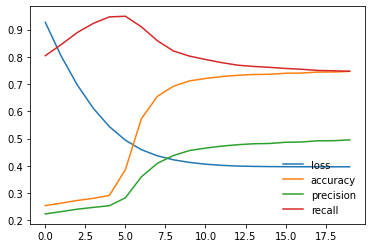

In [ ]:
ax = plt.axes()
for k, v in hist.items():
  ax.plot(epochs, v, label=k)
ax.legend(loc='lower right', frameon=False);

In [ ]:
# evaluating
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop("median_house_value_is_high"))
model.evaluate(x = features, y = label, batch_size=batch_size)

170/170 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8096 - precision: 0.6203 - recall: 0.6138


[0.39657413959503174,
 0.8096470832824707,
 0.6202712059020996,
 0.6138450503349304]